In [11]:
import numpy as np
import cv2
import plotly.express as px
import matplotlib.pyplot as plt

from typing import List

In [117]:
def generate_noise(size):
    normal_dist = np.random.normal(0, 1, size)
    noise = (normal_dist - normal_dist.min()) / (normal_dist.max() - normal_dist.min()) * 255
    return noise.astype(np.uint8, copy=False)
    
def decimal_to_binary(value):
    return np.binary_repr(value, width=8)

def binary_to_decimal(value):
    return int(value, base=2)

In [78]:
def generate_permutations_map(image_shape, seed=322):
    x_shape, y_shape = image_shape
    xv, yv = np.meshgrid(np.arange(x_shape), np.arange(y_shape))
    positions = np.concatenate([np.expand_dims(xv, 2), np.expand_dims(yv, 2)], axis=2).reshape(-1, 2)
    return np.random.permutation(positions)

In [2]:
def string_to_binary_encoder(payload: str) -> List[str]:
    return [format(ord(x), '08b') for x in payload]

In [208]:
def rmse(x1, x2):
    return np.mean((x1 ** 2 - x2 ** 2) ** 0.5)

In [3]:
message = 'Prise the sun'
encoded_message = string_to_binary_encoder(message)
print(encoded_message)  # In such case jupyter will not add \n after each element

['01010000', '01110010', '01101001', '01110011', '01100101', '00100000', '01110100', '01101000', '01100101', '00100000', '01110011', '01110101', '01101110']


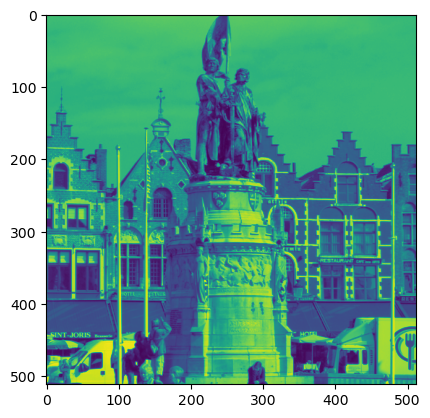

In [84]:
image = cv2.imread('data/Image00001.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [55]:
512 * 512 * 0.01 / 8

327.68

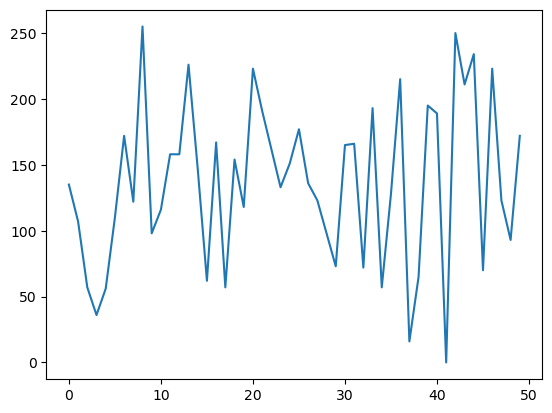

In [41]:
plt.plot(generate_noise((50, 1)))

In [164]:
seed = 322
N_b = 32500
noise = generate_noise((N_b, ))
print((N_b * 8) / (512 * 512))
permutations_map = generate_permutations_map((512, 512), seed)

0.9918212890625


In [165]:
def lsb_replacement(image, payload, permutations_map, verbose=False):
    number_of_replacement = 0

    for payload_idx, payload_element in enumerate(payload):
        b_payload_element = decimal_to_binary(payload_element)
        for bin_idx, payload_bin in enumerate(b_payload_element):
            y_pos, x_pos = permutations_map[(payload_idx * 8) + bin_idx]
            image_element = image[y_pos, x_pos]
            b_image_element = decimal_to_binary(image_element)
            b_image_element = b_image_element[:-1] + payload_bin
            image[y_pos, x_pos] = binary_to_decimal(b_image_element)

            if image_element != image[y_pos, x_pos]:
                number_of_replacement += 1

    if verbose:
        print('Total number of replacement', number_of_replacement)

In [210]:
def encode(image_path, q, verbose=False):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    N_b = int(np.prod([*image.shape, q]) / 8)
    if verbose:
        print("Signal's length: ", N_b)

    payload = generate_noise((N_b, ))
    encoded_image = image.copy()
    lsb_replacement(encoded_image, payload, permutations_map, verbose)
    return image, encoded_image, payload

In [211]:
image, encoded_image, signal = encode('data/Image00001.tif', q=0.9, verbose=True)

Signal's length:  29491
Total number of replacement 117616


4.898067450236548


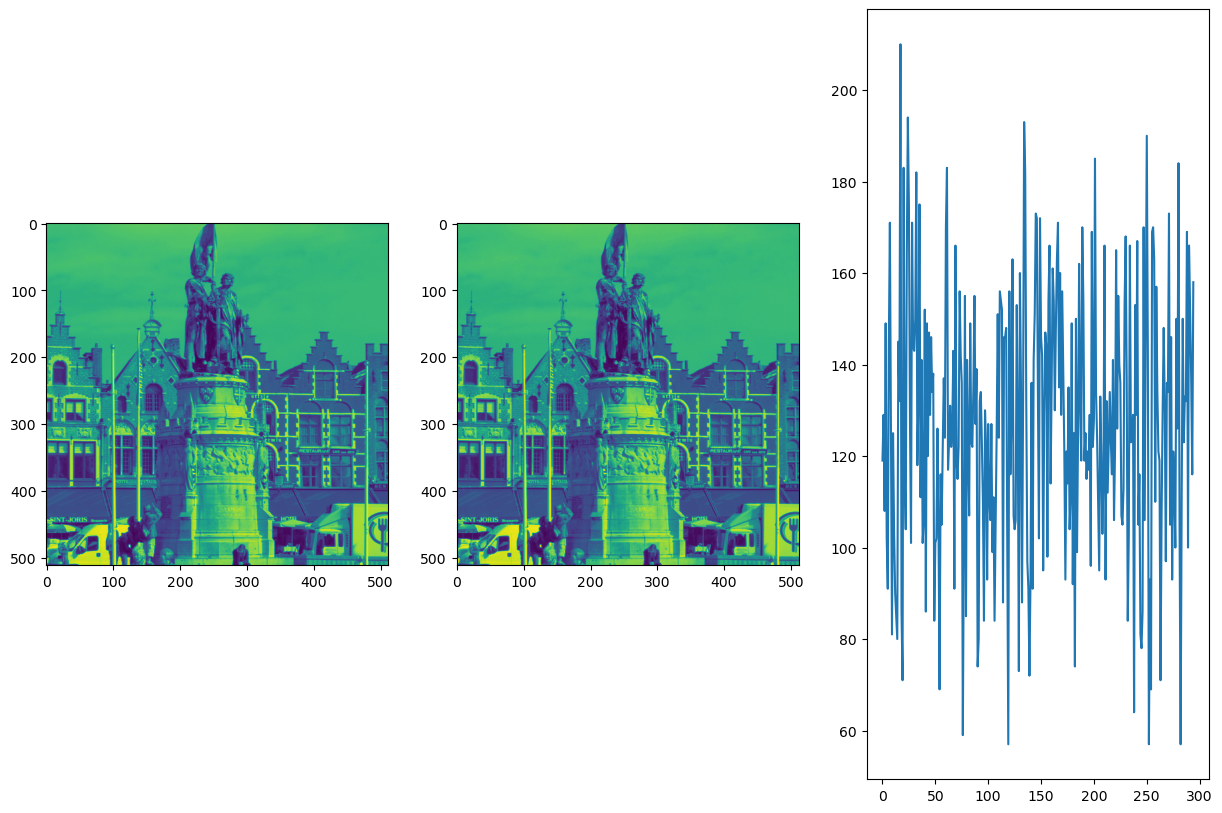

In [214]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.imshow(image)
ax2.imshow(encoded_image)
ax3.plot(signal[::100])
print(rmse(image, encoded_image))

In [113]:
decimal_to_binary(10)

'00001010'

In [116]:
int('00001010', base=2)

10

In [126]:
515 * 512 / 8

32960.0